#### Name: Rajnita Leichombam
#### USC-ID : 1370432160
#### Github-Username: Rajnita

# HOMEWORK - 8

# 1.Supervised, Semi-Supervised, and Unsupervised Learning

## 1(a)
Data is downloaded and put in ../data folder

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from numpy import random
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_curve,roc_auc_score,auc, confusion_matrix, classification_report 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.cluster import SpectralClustering
from sklearn.metrics import RocCurveDisplay

## Reading Data

In [2]:
raw_df=pd.read_csv('../data/wdbc.data', header=None)
columns=['RecordId','Diagnosis']
for i in range(1,31) :
    columns.append('Feature_'+str(i));
raw_df.columns=columns;
print(columns)
raw_df

['RecordId', 'Diagnosis', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30']


,RecordId,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Removing unnecessary column and renaming the classes, converting to numericals (M=0,B=1)

In [3]:
raw_df = raw_df.drop('RecordId', axis=1)
raw_df.replace({'M':0, 'B':1}, inplace=True)

target_cols=raw_df.columns.values[0]
feature_cols=raw_df.columns.values[1:]
print("Target:", target_cols)
print("Feature Cols:", feature_cols)
raw_df


Target: Diagnosis
Feature Cols: ['Feature_1' 'Feature_2' 'Feature_3' 'Feature_4' 'Feature_5' 'Feature_6'
 'Feature_7' 'Feature_8' 'Feature_9' 'Feature_10' 'Feature_11'
 'Feature_12' 'Feature_13' 'Feature_14' 'Feature_15' 'Feature_16'
 'Feature_17' 'Feature_18' 'Feature_19' 'Feature_20' 'Feature_21'
 'Feature_22' 'Feature_23' 'Feature_24' 'Feature_25' 'Feature_26'
 'Feature_27' 'Feature_28' 'Feature_29' 'Feature_30']


,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 1(b) Monte Carlo Simulation - Supervised, Unsupervised,Semi-supervised

### Splitting to train and test set

In [4]:
m_raw_df=raw_df.loc[raw_df['Diagnosis'] == 0]
b_raw_df=raw_df.loc[raw_df['Diagnosis'] == 1]
print("Number of malign cases in the dataset:", m_raw_df.shape[0])
print("Number of benign cases in the dataset:", b_raw_df.shape[0])
print("Total Rows:", raw_df.shape[0])

Number of malign cases in the dataset: 212
Number of benign cases in the dataset: 357
Total Rows: 569


In [5]:
## Using this method of specifying always round up and give total as 115. 
# m_train,m_test=train_test_split(m_raw_df, train_size=0.80, random_state=7)
# b_train,b_test=train_test_split(b_raw_df, train_size=0.80, random_state=7)

m_test_size=int(0.20*m_raw_df.shape[0]);
b_test_size=int(0.20*b_raw_df.shape[0]);

m_train,m_test=train_test_split(m_raw_df, train_size=m_test_size, random_state=7)
b_train,b_test=train_test_split(b_raw_df, train_size=b_test_size, random_state=7)

raw_train_data=pd.concat([m_train, b_train], ignore_index=True)
raw_test_data=pd.concat([m_test, b_test], ignore_index=True)
print("Total Train data samples:", raw_train_data.shape[0])
print("Total Test data samples:", raw_test_data.shape[0])


Total Train data samples: 113
Total Test data samples: 456


## 1(b)(i) Supervised Learning

### Normalizing the data

In [6]:
def split_into_train_test_set(m_raw_df, b_raw_df,m_test_size,b_test_size):
    random_val = random.randint(0,100)
    m_train,m_test=train_test_split(m_raw_df, test_size=m_test_size, random_state=random_val)
    b_train,b_test=train_test_split(b_raw_df, test_size=b_test_size, random_state=random_val)
    raw_train_data=pd.concat([m_train, b_train], ignore_index=True)
    raw_test_data=pd.concat([m_test, b_test], ignore_index=True)
    return  raw_train_data, raw_test_data
    
def normalize_data(raw_train_data, raw_test_data):
    normalizer=preprocessing.MinMaxScaler()
    normalized_trainX_data = normalizer.fit_transform(raw_train_data[feature_cols])
    normalized_testX_data = normalizer.transform(raw_test_data[feature_cols])
    normalized_trainX_data_df=pd.DataFrame(normalized_trainX_data, columns=feature_cols)
    trainY_df=raw_train_data[target_cols]
    normalized_testX_data_df=pd.DataFrame(normalized_testX_data, columns=feature_cols)
    testY_df=raw_test_data[target_cols]
    return normalized_trainX_data_df,trainY_df,normalized_testX_data_df, testY_df
    

## Training L1-penalized SVM

In [7]:
def get_PenaltySVCClassifier_post_GridSearch(train_x, train_y):
    c_vals=  np.logspace(-3,4,8)
    params = {
              'C':c_vals
    }
    l1_svc=LinearSVC(penalty='l1', dual=False)
    grid_cv = GridSearchCV(l1_svc,cv=5, param_grid=params)
    grid_cv.fit(train_x, train_y)
    return grid_cv

def calculate_metrics(train_report, test_report,trainY, pred_trainY,testY,pred_testY, train_decision_score, test_decision_score):
       
#     print(grid_cv.score(normalized_trainX, trainY))

    ##Calculate accuracy
    train_report['accuracy']=accuracy_score(trainY, pred_trainY)
    test_report['accuracy']=accuracy_score(testY,pred_testY)

    ##Calculate precision
    train_report['precision']=precision_score(trainY,pred_trainY)
    test_report['precision']=precision_score(testY,pred_testY)

    ##Calculate recall
    train_report['recall']=recall_score(trainY,pred_trainY)
    test_report['recall']=recall_score(testY,pred_testY)
    
    ##Calculate F1 score
    train_report['f1_score']=f1_score(trainY,pred_trainY)
    test_report['f1_score']=f1_score(testY,pred_testY)
    
    #     fpr, tpr, th = roc_curve(testY, test_decision_score)
    #     print(auc(fpr, tpr))
    ##roc_auc_score also gives the same value
    train_report['auc']=roc_auc_score(trainY,train_decision_score)
    test_report['auc']=roc_auc_score(testY,test_decision_score)
    
def initialize_report_maps(train_report,test_report):
    report_params=['accuracy','precision','recall', 'f1_score', 'auc']
    for param in report_params:
        train_report[param]=[]
        test_report[param]=[]
    train_report['best_C']=[]
        
        

In [10]:
m_test_size=int(0.20*m_raw_df.shape[0]);
b_test_size=int(0.20*b_raw_df.shape[0]);

all_train_reports=[]
all_test_reports=[]

for iteration in range(1,31):
    train_report={}
    test_report={}
    initialize_report_maps(train_report,test_report);
    
    raw_train_data, raw_test_data = split_into_train_test_set(m_raw_df, b_raw_df,m_test_size,b_test_size)
    normalized_trainX,trainY,normalized_testX, testY= normalize_data(raw_train_data, raw_test_data)
    
    grid_cv = get_PenaltySVCClassifier_post_GridSearch(normalized_trainX,trainY)
    train_report['best_C'] =grid_cv.best_params_['C']
    
    #Predicting train and test set
    pred_trainY = grid_cv.predict(normalized_trainX)
    pred_testY = grid_cv.predict(normalized_testX)
    
    train_decision_score=grid_cv.decision_function(normalized_trainX)
    test_decision_score=grid_cv.decision_function(normalized_testX)
    
    calculate_metrics(train_report, test_report,trainY, pred_trainY,testY,pred_testY,train_decision_score, test_decision_score);

    all_train_reports.append(train_report)
    all_test_reports.append(test_report)


## Print Metrics of all Simulations

In [11]:
train_report_df = pd.DataFrame(all_train_reports, columns=['accuracy','precision','recall', 'f1_score', 'auc','best_C'])
train_report_df.insert(loc=0,column='Simulation',value=np.arange(1,31))
print("************************TRAIN DATA REPORT************************")
train_report_df

************************TRAIN DATA REPORT************************


,Simulation,accuracy,precision,recall,f1_score,auc,best_C
0,1,0.989035,0.989547,0.993007,0.991274,0.997038,1.0
1,2,0.986842,0.986111,0.993007,0.989547,0.998005,10.0
2,3,0.986842,0.982759,0.996503,0.989583,0.997162,1.0
3,4,0.982456,0.979310,0.993007,0.986111,0.997182,1.0
4,5,0.986842,0.989510,0.989510,0.989510,0.997943,10.0
5,6,0.980263,0.975945,0.993007,0.984402,0.997121,1.0
6,7,0.980263,0.975945,0.993007,0.984402,0.996606,1.0
7,8,0.989035,0.986159,0.996503,0.991304,0.999239,100.0
8,9,0.984649,0.976109,1.000000,0.987910,0.998396,1.0
9,10,0.978070,0.979167,0.986014,0.982578,0.996524,1.0


In [12]:
test_report_df = pd.DataFrame(all_test_reports, columns=['accuracy','precision','recall', 'f1_score', 'auc'])
test_report_df.insert(loc=0,column='Simulation',value=np.arange(1,31))
print("************************TEST DATA REPORT************************")
test_report_df

************************TEST DATA REPORT************************


,Simulation,accuracy,precision,recall,f1_score,auc
0,1,0.964602,0.971831,0.971831,0.971831,0.995641
1,2,0.982301,1.000000,0.971831,0.985714,0.999329
2,3,0.982301,0.985915,0.985915,0.985915,0.997988
3,4,0.964602,0.958904,0.985915,0.972222,0.993964
4,5,0.991150,0.986111,1.000000,0.993007,0.999329
5,6,0.964602,0.971831,0.971831,0.971831,0.996982
6,7,0.982301,0.985915,0.985915,0.985915,0.998994
7,8,0.955752,0.985294,0.943662,0.964029,0.994970
8,9,0.946903,0.933333,0.985915,0.958904,0.985245
9,10,0.991150,0.986111,1.000000,0.993007,1.000000


## Average Metrics of all iterations

In [13]:
def get_average_metrics(report_df):
    avg_accuracy = np.mean(report_df['accuracy'])
    avg_precision=np.mean(report_df['precision'])
    avg_recall=np.mean(report_df['recall'])
    avg_f1_score=np.mean(report_df['f1_score'])
    avg_auc=np.mean(report_df['auc']) 
    return [avg_accuracy,avg_precision,avg_recall,avg_f1_score,avg_auc]

average_report_df=pd.DataFrame({'metrics':['accuracy','precision','recall', 'f1_score', 'auc'], 
                               'Train Data': get_average_metrics(train_report_df),
                               'Test Data': get_average_metrics(test_report_df)})

print("****************AVERAGE RESULTS REPORT****************")
average_report_df

****************AVERAGE RESULTS REPORT****************


,metrics,Train Data,Test Data
0,accuracy,0.987061,0.969322
1,precision,0.984801,0.969837
2,recall,0.994755,0.982160
3,f1_score,0.989744,0.975804
4,auc,0.998073,0.990331


## ROC Plot, confusion matrix and classification report for the last run

https://datascience.stackexchange.com/questions/69442/plotting-roc-auc-for-svm-algorithm

**********TRAIN - CONFUSION MATRIX**********
 [[165   5]
 [  1 285]]
**********TEST - CONFUSION MATRIX**********
 [[41  1]
 [ 2 69]]
**********TRAIN - Classification Report**********
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       170
           1       0.98      1.00      0.99       286

    accuracy                           0.99       456
   macro avg       0.99      0.98      0.99       456
weighted avg       0.99      0.99      0.99       456

**********TEST - Classification Report**********
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        71

    accuracy                           0.97       113
   macro avg       0.97      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



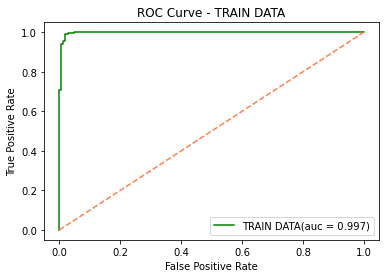

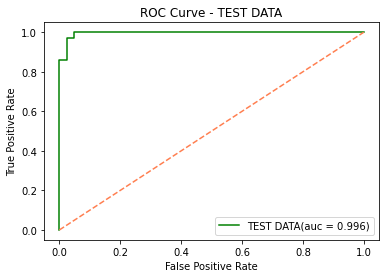

In [14]:
def draw_roc_curve(true_y,pred_decision_scores,title):
    fpr,tpr,threshold = roc_curve(true_y,pred_decision_scores)
    roc_auc=auc(fpr, tpr)
    plt.plot(fpr, tpr, 'green',label=title+'(auc = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'coral',  linestyle='--')
    plt.title('ROC Curve - '+title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend() 
    plt.show()

tr_cm=confusion_matrix(trainY,pred_trainY)
te_cm=confusion_matrix(testY,pred_testY)
print("**********TRAIN - CONFUSION MATRIX**********\n", tr_cm)
print("**********TEST - CONFUSION MATRIX**********\n", te_cm)

tr_cr=classification_report(trainY,pred_trainY)
te_cr=classification_report(testY,pred_testY)
print("**********TRAIN - Classification Report**********\n", tr_cr)
print("**********TEST - Classification Report**********\n", te_cr)

train_decision_score=grid_cv.decision_function(normalized_trainX)
test_decision_score=grid_cv.decision_function(normalized_testX)

draw_roc_curve(trainY,train_decision_score,'TRAIN DATA')
draw_roc_curve(testY, test_decision_score,'TEST DATA')
   

## 1(b)ii.Semi-Supervised Learning/ Self-training:

#### REFERENCES
https://www.geeksforgeeks.org/ml-decision-function/
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC.decision_function
https://stackoverflow.com/questions/64561398/how-does-decision-function-in-scikit-learn-calculates-the-scores
https://stats.stackexchange.com/questions/167682/getting-distance-of-points-from-decision-boundary-with-linear-svm

In [15]:
def split_label_and_unlabel(normalized_trainX,trainY):
    tr_df=normalized_trainX.copy()
    tr_df['Diagnosis']=trainY
    
    m_tr_df=tr_df.loc[tr_df['Diagnosis'] == 0]
    b_tr_df=tr_df.loc[tr_df['Diagnosis'] == 1]
    
    m_label_size=int(0.50*m_tr_df.shape[0]);
    b_label_size=int(0.50*b_tr_df.shape[0]);

    m_label,m_unlabel=train_test_split(m_tr_df, train_size=m_label_size)
    b_label,b_unlabel=train_test_split(b_tr_df, train_size=b_label_size)
    
    label_train_data=pd.concat([m_label, b_label], ignore_index=True)
    unlabel_train_data=pd.concat([m_unlabel, b_unlabel], ignore_index=True)
    return  label_train_data, unlabel_train_data

In [17]:
m_test_size=int(0.20*m_raw_df.shape[0]);
b_test_size=int(0.20*b_raw_df.shape[0]);

all_train_reports_semi=[]
all_test_reports_semi=[]

for iteration in range(1,31):
    train_report_semi={}
    test_report_semi={}
    initialize_report_maps(train_report_semi,test_report_semi);
    
    raw_train_data, raw_test_data = split_into_train_test_set(m_raw_df, b_raw_df,m_test_size,b_test_size)
    normalized_trainX,trainY,normalized_testX, testY= normalize_data(raw_train_data, raw_test_data)
    
    ##Splitting into label and unlabel set
    label_train_data, unlabel_train_data = split_label_and_unlabel(normalized_trainX,trainY)
    
    c_vals=  np.logspace(-3,4,8)
    params = {
              'C':c_vals
    }
    l1_svc=LinearSVC(penalty='l1', dual=False)
    grid_cv = GridSearchCV(l1_svc,cv=5, param_grid=params)
    while(len(unlabel_train_data)>0):
#         print("Iter", len(unlabel_train_data))
            
        grid_cv = grid_cv.fit(label_train_data[feature_cols], label_train_data[target_cols])
        decision_scores = grid_cv.decision_function(unlabel_train_data[feature_cols])
        max_index = np.argmax(decision_scores)
        farthest_point=unlabel_train_data.iloc[max_index]
        farthest_point_df=pd.DataFrame(farthest_point).T
        
        predicted_label = grid_cv.predict(farthest_point_df[feature_cols])
        farthest_point_df[target_cols]=predicted_label
#         temp=pd.DataFrame(farthest_point)
        label_train_data=pd.concat([label_train_data, farthest_point_df],ignore_index=True,axis=0)
        unlabel_train_data.drop(index=max_index, inplace=True)
        unlabel_train_data.reset_index(inplace=True, drop=True)
    
    train_report_semi['best_C'] =grid_cv.best_params_['C']
        
    ##Predicting train and test set
    pred_trainY = grid_cv.predict(normalized_trainX)
    pred_testY = grid_cv.predict(normalized_testX)
    train_decision_score=grid_cv.decision_function(normalized_trainX)
    test_decision_score=grid_cv.decision_function(normalized_testX)
    
    calculate_metrics(train_report_semi, test_report_semi,trainY, pred_trainY,testY,pred_testY,train_decision_score, test_decision_score);

    all_train_reports_semi.append(train_report_semi)
    all_test_reports_semi.append(test_report_semi)

## Semi-Supervised - Print metrics of all Simulations

In [18]:
semi_train_report_df = pd.DataFrame(all_train_reports_semi, columns=['accuracy','precision','recall', 'f1_score', 'auc','best_C'])
semi_train_report_df.insert(loc=0,column='Simulation',value=np.arange(1,31))
print("************************SEMI_SUPERVISED - TRAIN DATA REPORT************************")
semi_train_report_df

************************SEMI_SUPERVISED - TRAIN DATA REPORT************************


,Simulation,accuracy,precision,recall,f1_score,auc,best_C
0,1,0.975877,0.966102,0.996503,0.981067,0.996092,1.0
1,2,0.969298,0.953333,1.000000,0.976109,0.995537,1.0
2,3,0.951754,0.937086,0.989510,0.962585,0.988852,10.0
3,4,0.969298,0.956376,0.996503,0.976027,0.989531,10.0
4,5,0.982456,0.976027,0.996503,0.986159,0.993254,10.0
5,6,0.971491,0.962712,0.993007,0.977625,0.991012,1.0
6,7,0.980263,0.982578,0.986014,0.984293,0.991259,10.0
7,8,0.964912,0.956081,0.989510,0.972509,0.994550,1.0
8,9,0.978070,0.969388,0.996503,0.982759,0.993357,10.0
9,10,0.971491,0.956522,1.000000,0.977778,0.995701,1.0


In [19]:
semi_test_report_df = pd.DataFrame(all_test_reports_semi, columns=['accuracy','precision','recall', 'f1_score', 'auc'])
semi_test_report_df.insert(loc=0,column='Simulation',value=np.arange(1,31))
print("************************SEMI SUPERVISED - TEST DATA REPORT************************")
semi_test_report_df

************************SEMI SUPERVISED - TEST DATA REPORT************************


,Simulation,accuracy,precision,recall,f1_score,auc
0,1,0.955752,0.934211,1.000000,0.965986,0.991281
1,2,0.982301,0.985915,0.985915,0.985915,0.997317
2,3,0.973451,0.959459,1.000000,0.979310,0.966130
3,4,0.973451,0.972222,0.985915,0.979021,0.998323
4,5,0.946903,0.922078,1.000000,0.959459,0.983233
5,6,0.982301,0.985915,0.985915,0.985915,0.997653
6,7,1.000000,1.000000,1.000000,1.000000,1.000000
7,8,0.991150,1.000000,0.985915,0.992908,1.000000
8,9,0.982301,0.985915,0.985915,0.985915,0.998659
9,10,0.955752,0.934211,1.000000,0.965986,0.994970


## Semi supervised - Average Metrics of all iterations

In [20]:
semi_average_report_df=pd.DataFrame({'metrics':['accuracy','precision','recall', 'f1_score', 'auc'], 
                               'Train Data': get_average_metrics(semi_train_report_df),
                               'Test Data': get_average_metrics(semi_test_report_df)})

print("****************AVERAGE RESULTS REPORT****************")
semi_average_report_df

****************AVERAGE RESULTS REPORT****************


,metrics,Train Data,Test Data
0,accuracy,0.971053,0.961062
1,precision,0.959367,0.951632
2,recall,0.996387,0.989671
3,f1_score,0.977438,0.969856
4,auc,0.993191,0.989157


## SEMI-SUPERVISED - ROC Plot, confusion matrix and classification report for the last run

**********TRAIN - CONFUSION MATRIX**********
 [[160  10]
 [  1 285]]
**********TEST - CONFUSION MATRIX**********
 [[41  1]
 [ 0 71]]
**********TRAIN - Classification Report**********
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       170
           1       0.97      1.00      0.98       286

    accuracy                           0.98       456
   macro avg       0.98      0.97      0.97       456
weighted avg       0.98      0.98      0.98       456

**********TEST - Classification Report**********
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        71

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113



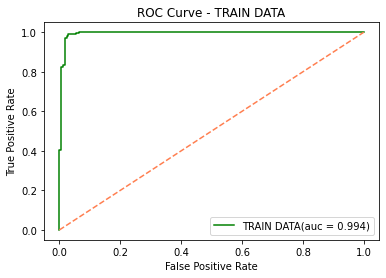

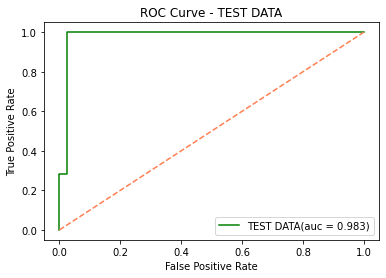

In [21]:
semi_pred_trainY = grid_cv.predict(normalized_trainX)
semi_pred_testY = grid_cv.predict(normalized_testX)

tr_cm=confusion_matrix(trainY,semi_pred_trainY)
te_cm=confusion_matrix(testY,semi_pred_testY)
print("**********TRAIN - CONFUSION MATRIX**********\n", tr_cm)
print("**********TEST - CONFUSION MATRIX**********\n", te_cm)

tr_cr=classification_report(trainY,semi_pred_trainY)
te_cr=classification_report(testY,semi_pred_testY)
print("**********TRAIN - Classification Report**********\n", tr_cr)
print("**********TEST - Classification Report**********\n", te_cr)

train_decision_score=grid_cv.decision_function(normalized_trainX)
test_decision_score=grid_cv.decision_function(normalized_testX)

draw_roc_curve(trainY,train_decision_score,'TRAIN DATA')
draw_roc_curve(testY, test_decision_score,'TEST DATA')
   

## 1-(b)-iii  Unsupervised Learning: K Means Algorithm

In [42]:
def get_majority(values):
    freq_counter = Counter(values)
#     print(values)
#     print(freq_counter.most_common)
    return freq_counter.most_common(1)[0][0]
   
def get_Target_Labels(trainY, indices):
    labels=[]
#     print(trainY)
    for i in indices:
        labels.append(trainY.iloc[i])
#     print("LABELS",labels)
    return labels

def get_softmax_probs(values):
    numerator = np.exp(values - np.max(values))
    result = numerator / np.sum(np.exp(values))
    return result

def initialize_report_maps_clustering(train_report,test_report):
    report_params=['accuracy','precision','recall', 'f1_score', 'auc']
    for param in report_params:
        train_report[param]=[]
        test_report[param]=[]
def calculate_metrics_clustering(train_report, test_report,trainY, pred_trainY,testY,pred_testY):
       
#     print(grid_cv.score(normalized_trainX, trainY))

    ##Calculate accuracy
    train_report['accuracy']=accuracy_score(trainY, pred_trainY)
    test_report['accuracy']=accuracy_score(testY,pred_testY)

    ##Calculate precision
    train_report['precision']=precision_score(trainY,pred_trainY)
    test_report['precision']=precision_score(testY,pred_testY)

    ##Calculate recall
    train_report['recall']=recall_score(trainY,pred_trainY)
    test_report['recall']=recall_score(testY,pred_testY)
    
    ##Calculate F1 score
    train_report['f1_score']=f1_score(trainY,pred_trainY)
    test_report['f1_score']=f1_score(testY,pred_testY)
    
    ##Calculate AUC
    train_report['auc']=roc_auc_score(trainY,pred_trainY)
    test_report['auc']=roc_auc_score(testY,pred_testY)
    

#### REFERENCES

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_transform
https://stackoverflow.com/questions/34226400/find-the-index-of-the-k-smallest-values-of-a-numpy-array
https://stackoverflow.com/questions/26795535/output-50-samples-closest-to-each-cluster-center-using-scikit-learn-k-means-libr
https://www.delftstack.com/howto/numpy/numpy-softmax/

In [44]:
m_test_size=int(0.20*m_raw_df.shape[0]);
b_test_size=int(0.20*b_raw_df.shape[0]);

all_train_reports_kmeans=[]
all_test_reports_kmeans=[]

    
for simulation in range(1,31):
    train_report={}
    test_report={}
    initialize_report_maps_clustering(train_report,test_report);
    
    raw_train_data, raw_test_data = split_into_train_test_set(m_raw_df, b_raw_df,m_test_size,b_test_size)

    kmeans=KMeans(n_clusters=2,n_init=30)
    kmeans = kmeans.fit(raw_train_data[feature_cols])
    clusters=kmeans.cluster_centers_
    distance_array=kmeans.transform(raw_train_data[feature_cols])
    closest_to_first_center = np.argsort(distance_array[:,0])[:30]
    closest_to_second_center = np.argsort(distance_array[:,1])[:30]

    first_cluster_closest_labels=get_Target_Labels(raw_train_data[target_cols],closest_to_first_center)
    second_cluster_closest_labels=get_Target_Labels(raw_train_data[target_cols],closest_to_second_center)
    
    first_cluster_pred=get_majority(first_cluster_closest_labels)
    second_cluster_pred=get_majority(second_cluster_closest_labels)
    
    ##Labels assigned to cluster
    cluster_target_labels=[]
    cluster_target_labels.append(first_cluster_pred)
    cluster_target_labels.append(second_cluster_pred)
    
    train_data_cluster_labels = kmeans.labels_
    predicted_tr_Y=[]
    
    ##converting cluster label from kmeans model to an actual label (i.e. benign or malign - 0 or 1)
    for label in train_data_cluster_labels:
        predicted_tr_Y.append(cluster_target_labels[label])
    
    cluster_prediction_test_data=kmeans.predict(raw_test_data[feature_cols])
    
    predicted_te_Y=[]
    ##converting cluster label from kmeans model to an actual label (i.e. benign or malign - 0 or 1)
    ##cluster_target_labels contains corresponding target label (benign/malign) i.e. 1 or 0, according to cluster assigned (represented by indices)
    for cluster_label in cluster_prediction_test_data:
        predicted_te_Y.append(cluster_target_labels[cluster_label])
    
    calculate_metrics_clustering(train_report, test_report,trainY, predicted_tr_Y,testY,predicted_te_Y);

    all_train_reports_kmeans.append(train_report)
    all_test_reports_kmeans.append(test_report)

## K Means - Print metrics of all Simulations

In [45]:
km_train_report_df = pd.DataFrame(all_train_reports_kmeans, columns=['accuracy','precision','recall', 'f1_score', 'auc'])
km_train_report_df.insert(loc=0,column='Simulation',value=np.arange(1,31))
print("************************KMEANS - TRAIN DATA REPORT************************")
km_train_report_df

************************KMEANS - TRAIN DATA REPORT************************


,Simulation,accuracy,precision,recall,f1_score,auc
0,1,0.848684,0.807365,0.996503,0.892019,0.798252
1,2,0.837719,0.796089,0.996503,0.885093,0.783546
2,3,0.831140,0.789474,0.996503,0.880989,0.774722
3,4,0.864035,0.823699,0.996503,0.901899,0.818840
4,5,0.859649,0.818966,0.996503,0.899054,0.812958
5,6,0.853070,0.811966,0.996503,0.894819,0.804134
6,7,0.850877,0.809659,0.996503,0.893417,0.801193
7,8,0.853070,0.811966,0.996503,0.894819,0.804134
8,9,0.855263,0.814286,0.996503,0.896226,0.807075
9,10,0.848684,0.805634,1.000000,0.892356,0.797059


In [46]:
km_test_report_df = pd.DataFrame(all_test_reports_kmeans, columns=['accuracy','precision','recall', 'f1_score', 'auc'])
km_test_report_df.insert(loc=0,column='Simulation',value=np.arange(1,31))
print("************************KMEANS - TEST DATA REPORT************************")
km_test_report_df

************************KMEANS - TEST DATA REPORT************************


,Simulation,accuracy,precision,recall,f1_score,auc
0,1,0.867257,0.825581,1.000000,0.904459,0.821429
1,2,0.911504,0.876543,1.000000,0.934211,0.880952
2,3,0.849558,0.806818,1.000000,0.893082,0.797619
3,4,0.814159,0.771739,1.000000,0.871166,0.750000
4,5,0.849558,0.806818,1.000000,0.893082,0.797619
5,6,0.858407,0.816092,1.000000,0.898734,0.809524
6,7,0.858407,0.816092,1.000000,0.898734,0.809524
7,8,0.849558,0.806818,1.000000,0.893082,0.797619
8,9,0.840708,0.797753,1.000000,0.887500,0.785714
9,10,0.876106,0.843373,0.985915,0.909091,0.838196


## K Means -  Average Metrics of all iterations

In [47]:
k_average_report_df=pd.DataFrame({'metrics':['accuracy','precision','recall', 'f1_score', 'auc'], 
                               'Train Data': get_average_metrics(km_train_report_df),
                               'Test Data': get_average_metrics(km_test_report_df)})

print("****************KMEANS 0- AVERAGE RESULTS REPORT****************")
k_average_report_df

****************KMEANS 0- AVERAGE RESULTS REPORT****************


,metrics,Train Data,Test Data
0,accuracy,0.853070,0.844543
1,precision,0.811887,0.803631
2,recall,0.996853,0.998592
3,f1_score,0.894885,0.890206
4,auc,0.804015,0.791359


## Kmeans - ROC Plot, confusion matrix for the last run

**********TRAIN - CONFUSION MATRIX**********
 [[105  65]
 [  1 285]]
**********TEST - CONFUSION MATRIX**********
 [[24 18]
 [ 0 71]]
**********TRAIN - Classification Report**********
               precision    recall  f1-score   support

           0       0.99      0.62      0.76       170
           1       0.81      1.00      0.90       286

    accuracy                           0.86       456
   macro avg       0.90      0.81      0.83       456
weighted avg       0.88      0.86      0.85       456

**********TEST - Classification Report**********
               precision    recall  f1-score   support

           0       1.00      0.57      0.73        42
           1       0.80      1.00      0.89        71

    accuracy                           0.84       113
   macro avg       0.90      0.79      0.81       113
weighted avg       0.87      0.84      0.83       113



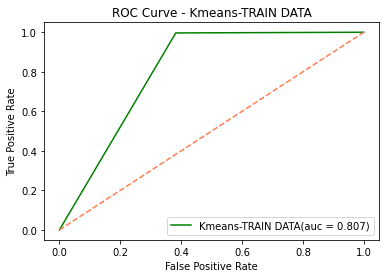

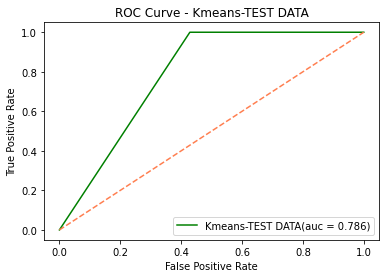

In [51]:
km_tr_cm=confusion_matrix(trainY,predicted_tr_Y)
km_te_cm=confusion_matrix(testY,predicted_te_Y)
print("**********TRAIN - CONFUSION MATRIX**********\n", km_tr_cm)
print("**********TEST - CONFUSION MATRIX**********\n", km_te_cm)

km_tr_cr=classification_report(trainY,predicted_tr_Y)
km_te_cr=classification_report(testY,predicted_te_Y)
print("**********TRAIN - Classification Report**********\n", km_tr_cr)
print("**********TEST - Classification Report**********\n", km_te_cr)

draw_roc_curve(trainY,predicted_tr_Y,'Kmeans-TRAIN DATA')
draw_roc_curve(testY,predicted_te_Y,'Kmeans-TEST DATA')

## 1-b-iv.Spectral Clustering

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In [57]:
m_test_size=int(0.20*m_raw_df.shape[0]);
b_test_size=int(0.20*b_raw_df.shape[0]);

all_train_reports_spectral=[]
all_test_reports_spectral=[]

    
for simulation in range(1,31):
    train_report={}
    test_report={}
    initialize_report_maps_clustering(train_report,test_report);
    
    raw_train_data, raw_test_data = split_into_train_test_set(m_raw_df, b_raw_df,m_test_size,b_test_size)

    ##normalize
    sp_normalized_trainX,sp_trainY,sp_normalized_testX, sp_testY= normalize_data(raw_train_data, raw_test_data)
    
    ##default is rbf
    spec_clustering=SpectralClustering(n_clusters=2,n_init=15)
    cluster_labels = spec_clustering.fit_predict(sp_normalized_trainX[feature_cols])
    
    first_cluster_indices=np.where(cluster_labels== 0)[0]
    second_cluster_indices=np.where(cluster_labels== 1)[0]
    
    ##Get the labels present in each cluster to find the majority
    first_cluster_actual_labels=get_Target_Labels(sp_trainY,first_cluster_indices)
    second_cluster_actual_labels=get_Target_Labels(sp_trainY,second_cluster_indices)
    
    first_cluster_pred=get_majority(first_cluster_actual_labels)
    second_cluster_pred=get_majority(second_cluster_actual_labels)
    
    ##Labels assigned to cluster
    cluster_target_labels=[]
    cluster_target_labels.append(first_cluster_pred)
    cluster_target_labels.append(second_cluster_pred)
    
    spec_predicted_tr_Y=[]
    
    ##converting cluster label from model to an actual label (i.e. benign or malign - 0 or 1)
    ## i.e.predicting the label based on the majority found from prev step
    for label in cluster_labels:
        spec_predicted_tr_Y.append(cluster_target_labels[label])
    
    sp_cluster_prediction_test_data=spec_clustering.fit_predict(sp_normalized_testX[feature_cols])
    
    spec_predicted_te_Y=[]
    ##converting cluster label from kmeans model to an actual label (i.e. benign or malign - 0 or 1)
    ##cluster_target_labels contains corresponding target label (benign/malign) i.e. 1 or 0, according to cluster assigned (represented by indices)
    for cluster_label in sp_cluster_prediction_test_data:
        spec_predicted_te_Y.append(cluster_target_labels[cluster_label])
    
    calculate_metrics_clustering(train_report, test_report,sp_trainY, spec_predicted_tr_Y,sp_testY,spec_predicted_te_Y);

    all_train_reports_spectral.append(train_report)
    all_test_reports_spectral.append(test_report)

## Spectral - Print metrics of all Simulations

In [58]:
sp_train_report_df = pd.DataFrame(all_train_reports_spectral, columns=['accuracy','precision','recall', 'f1_score', 'auc'])
sp_train_report_df.insert(loc=0,column='Simulation',value=np.arange(1,31))
print("************************KMEANS - TRAIN DATA REPORT************************")
sp_train_report_df

************************KMEANS - TRAIN DATA REPORT************************


,Simulation,accuracy,precision,recall,f1_score,auc
0,1,0.824561,0.781421,1.000000,0.877301,0.764706
1,2,0.842105,0.803977,0.989510,0.887147,0.791814
2,3,0.861842,0.823188,0.993007,0.900158,0.817092
3,4,0.861842,0.825073,0.989510,0.899841,0.818285
4,5,0.870614,0.832845,0.993007,0.905901,0.828856
5,6,0.853070,0.811966,0.996503,0.894819,0.804134
6,7,0.866228,0.827988,0.993007,0.903021,0.822974
7,8,0.853070,0.813754,0.993007,0.894488,0.805327
8,9,0.868421,0.826590,1.000000,0.905063,0.823529
9,10,0.872807,0.835294,0.993007,0.907348,0.831798


In [59]:
sp_test_report_df = pd.DataFrame(all_test_reports_spectral, columns=['accuracy','precision','recall', 'f1_score', 'auc'])
sp_test_report_df.insert(loc=0,column='Simulation',value=np.arange(1,31))
print("************************KMEANS - TEST DATA REPORT************************")
sp_test_report_df

************************KMEANS - TEST DATA REPORT************************


,Simulation,accuracy,precision,recall,f1_score,auc
0,1,0.353982,0.000000,0.000000,0.000000,0.476190
1,2,0.115044,0.000000,0.000000,0.000000,0.154762
2,3,0.761062,0.724490,1.000000,0.840237,0.678571
3,4,0.221239,0.000000,0.000000,0.000000,0.297619
4,5,0.150442,0.000000,0.000000,0.000000,0.202381
5,6,0.849558,0.806818,1.000000,0.893082,0.797619
6,7,0.159292,0.038462,0.014085,0.020619,0.209423
7,8,0.876106,0.843373,0.985915,0.909091,0.838196
8,9,0.610619,0.621622,0.971831,0.758242,0.485915
9,10,0.796460,0.755319,1.000000,0.860606,0.726190


## Spectral - Average Metrics of all iterations

In [60]:
sp_average_report_df=pd.DataFrame({'metrics':['accuracy','precision','recall', 'f1_score', 'auc'], 
                               'Train Data': get_average_metrics(sp_train_report_df),
                               'Test Data': get_average_metrics(sp_test_report_df)})

print("****************Spectral- AVERAGE RESULTS REPORT****************")
sp_average_report_df

****************Spectral- AVERAGE RESULTS REPORT****************


,metrics,Train Data,Test Data
0,accuracy,0.860234,0.522714
1,precision,0.821405,0.447474
2,recall,0.994056,0.563850
3,f1_score,0.899369,0.495755
4,auc,0.814577,0.508512


## Spectral - ROC Plot, confusion matrix for the last run¶

**********TRAIN - CONFUSION MATRIX**********
 [[105  65]
 [  3 283]]
**********TEST - CONFUSION MATRIX**********
 [[27 15]
 [ 0 71]]
**********TRAIN - Classification Report**********
               precision    recall  f1-score   support

           0       0.97      0.62      0.76       170
           1       0.81      0.99      0.89       286

    accuracy                           0.85       456
   macro avg       0.89      0.80      0.82       456
weighted avg       0.87      0.85      0.84       456

**********TEST - Classification Report**********
               precision    recall  f1-score   support

           0       1.00      0.64      0.78        42
           1       0.83      1.00      0.90        71

    accuracy                           0.87       113
   macro avg       0.91      0.82      0.84       113
weighted avg       0.89      0.87      0.86       113



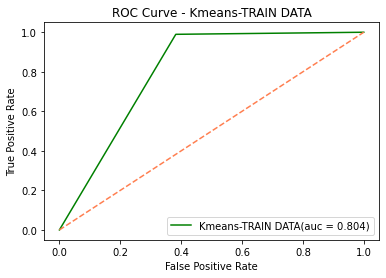

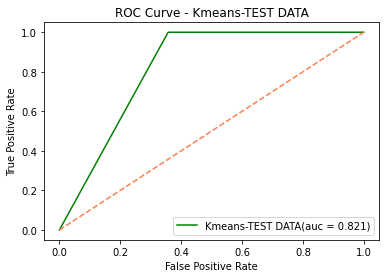

In [61]:
sp_tr_cm=confusion_matrix(trainY,spec_predicted_tr_Y)
sp_te_cm=confusion_matrix(testY,spec_predicted_te_Y)
print("**********TRAIN - CONFUSION MATRIX**********\n", sp_tr_cm)
print("**********TEST - CONFUSION MATRIX**********\n", sp_te_cm)

sp_tr_cr=classification_report(trainY,spec_predicted_tr_Y)
sp_te_cr=classification_report(testY,spec_predicted_te_Y)
print("**********TRAIN - Classification Report**********\n", sp_tr_cr)
print("**********TEST - Classification Report**********\n", sp_te_cr)

draw_roc_curve(trainY,spec_predicted_tr_Y,'Kmeans-TRAIN DATA')
draw_roc_curve(testY,spec_predicted_te_Y,'Kmeans-TEST DATA')

## 1-b-v Observations and comparisons

#### In this dataset we have seen that the supervised learning had the best accuracy and performed the best. Semi supervised learning performed almost close to supervised learning but slightly lower auc and accuracy compared to supervised learning. The unsupervised learning process i.e kmeans and spectral cluster had lesser accuracy, auc and hence performed bad compared to the SVC classifiers. 

# 2. Active Learning Using Support Vector Machines

## 2.a

Data is downloaded and put under ../data folder

In [63]:
dataframe = pd.read_csv("../data/data_banknote_authentication.txt", header=None)
columns=["variance","skewness","curtosis","entropy","class"]
features=["variance","skewness","curtosis","entropy"]
dataframe.columns=columns
dataframe

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


## 2.b

In [64]:
train_set, test_set = train_test_split(dataframe, train_size=900)


In [65]:
train_set

,variance,skewness,curtosis,entropy,class
982,-3.51800,2.87630,0.15480,-1.208600,1
855,-1.87820,-6.58650,4.84860,-0.021566,1
660,4.27560,-2.65280,2.13750,0.944370,0
752,0.38478,6.59890,-0.33360,-0.564660,0
173,-1.11930,10.72710,2.09380,-5.650400,0
...,...,...,...,...,...
767,-2.28040,-0.30626,1.33470,1.376300,1
1111,-6.36790,8.01020,0.42470,-3.220700,1
85,4.02960,2.67560,0.80685,0.716790,0
598,1.10500,7.44320,0.41099,-3.033200,0


In [66]:
test_set

,variance,skewness,curtosis,entropy,class
1315,-2.94980,-8.2730,10.264600,1.162900,1
1203,-6.73870,6.9879,0.678330,-7.588700,1
1246,-2.45610,-4.5566,6.453400,-0.056479,1
1335,-1.56810,-7.2446,6.553700,-0.127600,1
650,0.21084,9.4359,-0.094543,-1.859000,0
...,...,...,...,...,...
1314,-3.50600,-12.5667,15.160600,-0.752160,1
504,2.82970,6.3485,-0.735460,-0.586650,0
951,-1.69360,2.7852,-2.183500,-1.927600,1
608,5.08600,3.2798,-1.270100,1.118900,0


## 2b-i - PASSIVE LEARNING

In [67]:
report=[]

metrics=['iteration']
for i in range(1,91):
    col='SVM-'+str(i)
    metrics.append(col);

for iteration in range(1,51):
    current_result={}
    
    for metric in metrics:
        current_result[metric]=[]
        
    current_result['iteration']=iteration
    
    updated_train_data=train_set.copy()
    current_train_data=pd.DataFrame()

    for iteration in range(1,91):
        if(len(updated_train_data)>10):
            ## for the last iteration, updated train data will have only 10 samples and cant be splitted , that why we have else block
            sampled_tr,remaining_tr = train_test_split(updated_train_data, train_size=10, stratify=updated_train_data['class']) 
            updated_train_data=remaining_tr
        else:
            sampled_tr=updated_train_data
        current_train_data=pd.concat([current_train_data,sampled_tr], ignore_index=True)
        
        c_vals= np.logspace(-3, 6, 10)
        params = {
                  'C':c_vals
        }
        l1_svc=LinearSVC(penalty='l1', dual=False)
        grid_cv = GridSearchCV(l1_svc,cv=5, param_grid=params)
        grid_cv.fit(current_train_data[features], current_train_data['class']) 
        pred_y=grid_cv.predict(test_set[features])
        test_error=1-accuracy_score(pred_y, test_set['class'])
     
        col_name='SVM-'+str(iteration);
        current_result[col_name]=test_error
    
    report.append(current_result)        
    

## Printing test error each of 50 simulations- Passive Learning

In [68]:
passive_report=pd.DataFrame(report, columns=metrics)
passive_report


,iteration,SVM-1,SVM-2,SVM-3,SVM-4,SVM-5,SVM-6,SVM-7,SVM-8,SVM-9,...,SVM-81,SVM-82,SVM-83,SVM-84,SVM-85,SVM-86,SVM-87,SVM-88,SVM-89,SVM-90
0,1,0.057203,0.120763,0.082627,0.021186,0.025424,0.006356,0.006356,0.006356,0.006356,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
1,2,0.197034,0.061441,0.021186,0.021186,0.021186,0.027542,0.019068,0.010593,0.012712,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
2,3,0.148305,0.033898,0.033898,0.036017,0.036017,0.036017,0.033898,0.027542,0.029661,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
3,4,0.033898,0.016949,0.010593,0.021186,0.016949,0.055085,0.025424,0.010593,0.010593,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
4,5,0.144068,0.112288,0.033898,0.029661,0.019068,0.019068,0.019068,0.014831,0.016949,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
5,6,0.021186,0.016949,0.021186,0.019068,0.019068,0.012712,0.019068,0.019068,0.019068,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
6,7,0.146186,0.055085,0.029661,0.023305,0.019068,0.014831,0.004237,0.004237,0.014831,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
7,8,0.042373,0.036017,0.057203,0.023305,0.010593,0.014831,0.010593,0.014831,0.014831,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
8,9,0.158898,0.144068,0.158898,0.152542,0.072034,0.019068,0.008475,0.010593,0.014831,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
9,10,0.076271,0.027542,0.033898,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475


## Average test error values of 90 SVMs

In [70]:
avg_passive_list=[]
for i in range(1,91):
    result={}
    result['SVM']=i;
    result['Samples']=i*10;
    col='SVM-'+str(i)
    avg_te_err=np.mean(passive_report[col])
    result['Avg_test_error']=avg_te_err
    avg_passive_list.append(result)

overall_passive_avg_result=pd.DataFrame(avg_passive_list)

with pd.option_context('display.max_rows', None,):
    display(overall_passive_avg_result)

,SVM,Samples,Avg_test_error
0,1,10,0.117754
1,2,20,0.065847
2,3,30,0.046483
3,4,40,0.036525
4,5,50,0.030000
5,6,60,0.022966
6,7,70,0.017712
7,8,80,0.015763
8,9,90,0.016525
9,10,100,0.015466


## 2b-i - ACTIVE LEARNING

In [71]:
report=[]

metrics=['iteration']
for i in range(1,91):
    col='SVM-'+str(i)
    metrics.append(col);

for iteration in range(1,51):
    current_result={}
    
    for metric in metrics:
        current_result[metric]=[]
        
    current_result['iteration']=iteration
    
    updated_train_data=train_set.copy()
    current_train_data=pd.DataFrame()

    for iteration in range(1,91):
        if(len(updated_train_data)>10):
            ## for the last iteration, updated train data will have only 10 samples and cant be splitted , that why we have else block
            
            if iteration==1:
                ##randomly choosing for first iteration
                sampled_tr,remaining_tr = train_test_split(updated_train_data, train_size=10, stratify=updated_train_data['class']) 
                remaining_tr.reset_index(inplace=True, drop=True)
                updated_train_data=remaining_tr.copy()
            else:
                ##choose closest to hyperplane , grid_cv is already updated in the first iteration. This loop executes from second iterationa nd onwards
                decision_scores=grid_cv.decision_function(updated_train_data[features])
                decision_scores=np.abs(decision_scores)
                closest_to_hyperplane = np.argsort(decision_scores)[:10]
                sampled_tr = pd.DataFrame()
                for index in closest_to_hyperplane:
                    row = updated_train_data.loc[index]
                    sampled_tr = sampled_tr.append([row])
                updated_train_data=updated_train_data.drop(closest_to_hyperplane)
                updated_train_data.reset_index(inplace=True, drop=True)
        else:
            ## the last ten samples will be default the closest ones
            sampled_tr=updated_train_data
            
        current_train_data=pd.concat([current_train_data,sampled_tr], ignore_index=True)
        
        c_vals= np.logspace(-3, 6, 10)
        params = {
                  'C':c_vals
        }
        l1_svc=LinearSVC(penalty='l1', dual=False)
        grid_cv = GridSearchCV(l1_svc,cv=5, param_grid=params)
        grid_cv.fit(current_train_data[features], current_train_data['class']) 
        pred_y=grid_cv.predict(test_set[features])

        test_error=1-accuracy_score(pred_y, test_set['class'])
        col_name='SVM-'+str(iteration);
        current_result[col_name]=test_error
    
    report.append(current_result)        
    

## Printing test error for 50 simulations- Active Learning

In [72]:
active_report=pd.DataFrame(report, columns=metrics)
active_report

,iteration,SVM-1,SVM-2,SVM-3,SVM-4,SVM-5,SVM-6,SVM-7,SVM-8,SVM-9,...,SVM-81,SVM-82,SVM-83,SVM-84,SVM-85,SVM-86,SVM-87,SVM-88,SVM-89,SVM-90
0,1,0.139831,0.044492,0.038136,0.016949,0.141949,0.010593,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
1,2,0.108051,0.023305,0.019068,0.012712,0.010593,0.010593,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
2,3,0.137712,0.091102,0.014831,0.050847,0.029661,0.008475,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
3,4,0.044492,0.139831,0.050847,0.025424,0.008475,0.008475,0.010593,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.014831,0.014831
4,5,0.093220,0.036017,0.019068,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.014831,0.014831,0.014831,0.014831
5,6,0.099576,0.031780,0.061441,0.044492,0.014831,0.008475,0.006356,0.008475,0.014831,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
6,7,0.063559,0.025424,0.016949,0.006356,0.004237,0.008475,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
7,8,0.040254,0.095339,0.019068,0.010593,0.010593,0.008475,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
8,9,0.082627,0.023305,0.010593,0.010593,0.008475,0.008475,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
9,10,0.027542,0.046610,0.010593,0.008475,0.012712,0.008475,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475


## Average test error values of 90 SVMs

In [73]:
avg_active_list=[]
for i in range(1,91):
    result={}
    result['SVM']=i;
    result['Samples']=i*10;
    col='SVM-'+str(i)
    avg_te_err=np.mean(active_report[col])
    result['Avg_test_error']=avg_te_err
    avg_active_list.append(result)

overall_active_avg_result=pd.DataFrame(avg_active_list)

with pd.option_context('display.max_rows', None,):
    display(overall_active_avg_result)

,SVM,Samples,Avg_test_error
0,1,10,0.102331
1,2,20,0.047881
2,3,30,0.031780
3,4,40,0.020085
4,5,50,0.016568
5,6,60,0.012161
6,7,70,0.009746
7,8,80,0.009025
8,9,90,0.009280
9,10,100,0.008814


## 2.c Plot average test error versus number of training instances
The average test errors were printed in the above cells

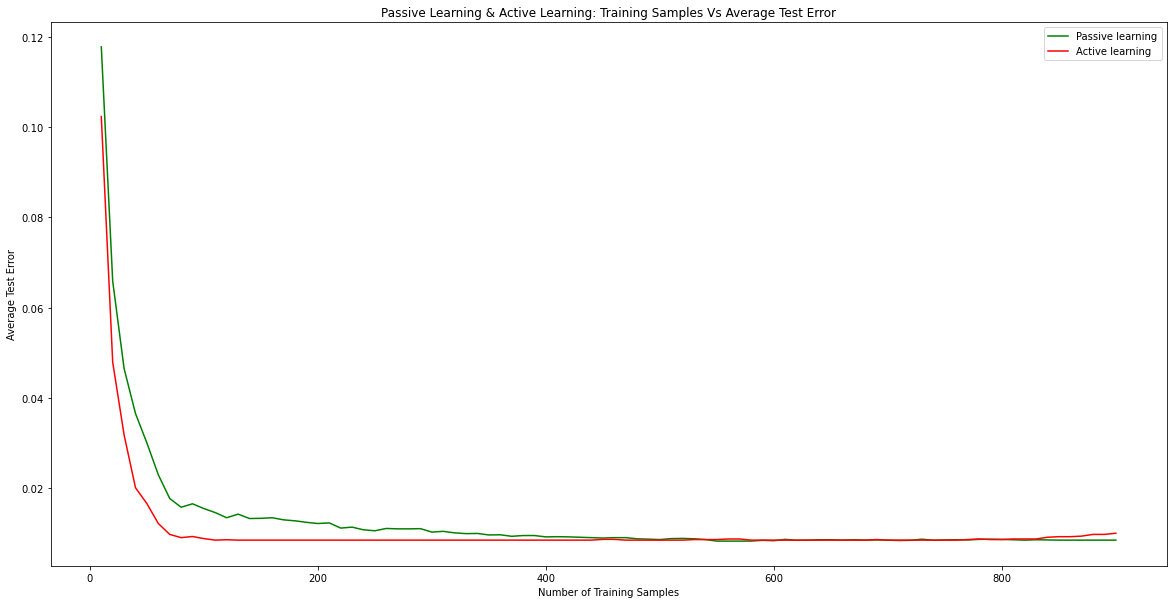

In [74]:
plt.figure(figsize=(20, 10))
plt.plot(overall_passive_avg_result['Samples'], overall_passive_avg_result['Avg_test_error'], 'g', label="Passive learning")
plt.plot(overall_active_avg_result['Samples'], overall_active_avg_result['Avg_test_error'], 'r', label="Active learning")
plt.title('Passive Learning & Active Learning: Training Samples Vs Average Test Error')
plt.xlabel('Number of Training Samples')
plt.ylabel('Average Test Error')
plt.legend()
plt.show()

## Observations

From the above graph we can see that, as we increase the number of training instances, there is a decline in the test error. Test error initially has a sharp decline initially and then over multiple instances being added, there is no much changes in the test error. Here in the active learning, the sharp decline in test error  after increasing the instances is more than that of passive learning. Since in active learning, we added the closest points to the hyperplane, the SVM performed slightly better, whereas in passive learning, points were kinda randomly chosen.


## REFERENCES
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions
    
        